In [12]:
library(tidyverse)
library(tidymodels)

In [18]:
set.seed(411)
url <- "https://raw.githubusercontent.com/dzhen2023/dsci-100-2024w1-group-009-12/refs/heads/main/players.csv"
download.file(url, "players.csv")
players_data <- read_csv("players.csv")
players_data <- players_data |> 
    select(played_hours,age)

players_split <- initial_split(players_data, prop = 0.75, strata = played_hours)
players_train <- training(players_split) 
players_test <- testing(players_split)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [19]:
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

players_recipe <- recipe(played_hours ~ age, data = players_train)

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(lm_spec) |>
    fit(data = players_train)

players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          age  
    12.5466      -0.2556  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,7.959298e+00
rsq,standard,4.001080e-06
mae,standard,7.270594e+00


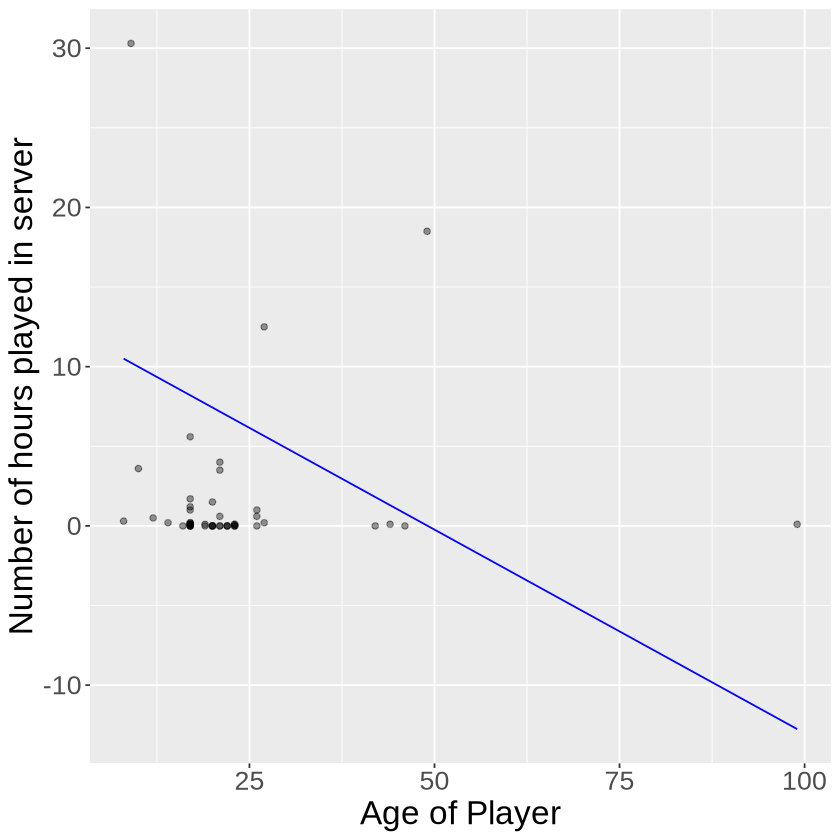

In [28]:
players_pred <- players_fit |>
    predict(players_test) |>
    bind_cols(players_test)

players_test_results <- players_pred |>
    metrics(truth = played_hours, estimate = .pred)
players_test_results

lm_predictions <- players_pred |>
     ggplot(aes(x = age, y = played_hours)) +
        geom_point(alpha = 0.4) +
         geom_line(data = players_pred,
             mapping = aes(x = age, y = .pred), 
            color = "blue") +
         xlab("Age of Player") +
         ylab("Number of hours played in server") +
         theme(text = element_text(size = 20))

lm_predictions